In [19]:
import pandas as pd
import numpy as np

# importing the data set
data_set=pd.read_csv('Mall_Customers.csv')
data_set

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
# Data Cleaning and organization
 # Dropping the id column
data_set=data_set.drop(['CustomerID'],axis=1)
data_set

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [21]:
#Data manipulation, replace Gender column values with binary vaalues 1,0
data_set['Gender']=data_set['Gender'].replace(to_replace=['Male','Female'], value=[1,0])
data_set

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [22]:
# converting the dataframe into list of arrays
x= data_set.values
x

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

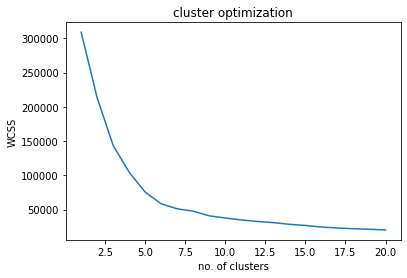

In [23]:
# using the elbow method to check the optimum number of clusters to use.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss=[]
for i in range(1,21):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21),wcss)
plt.title('cluster optimization')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# making use of the KMeans cluster model to train the data set
kmeans= KMeans(n_clusters= 5, init= 'k-means++', random_state=0)
y_kmeans= kmeans.fit_predict(x)
#y_kmeans

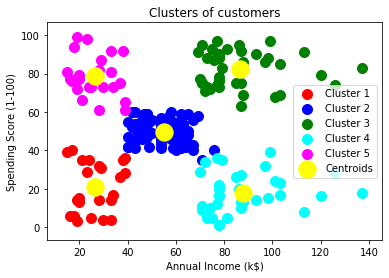

In [25]:
#ploting the clusters of the data set with x-axis as annual income and the y-axis 
#as the spending score

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 2], x[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 2], x[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()